# Clapstone Project Final

## Overview

### 1. This final project aims to analyze overall usage of languages and databases among IT community. 
### 2. The data was collected from a survey in which IT experts were asked about preferences and usages of tools and programming languages. This project analyzes preferences in order to understand what is going on in the future (1 year approach).
### 3. The workflow for this assignment will be: Utilize python and sql to get the data (.csv file), clean the data, do some EDA analysis and then get key visualizations. Finally, we are goin to create a dashboard in Power Bi for further analysis.

## Getting data

In [86]:
# First we import the packages needed
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msgno

The data needed is separated in two tables so we need to apply a join and merge them with SQL

In [87]:
SELECT * 
FROM m5_survey_data_technologies_normalised.csv 
LIMIT 5;

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs
0,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None
1,4.0,C,C,MySQL,MySQL,Linux,Linux,None,None,Eclipse,None,None,None,None
2,4.0,C++,C#,SQLite,SQLite,Windows,Windows,None,None,Vim,None,None,None,None
3,4.0,C#,JavaScript,None,None,None,None,None,None,Visual Studio,None,None,None,None
4,4.0,Python,SQL,None,None,None,None,None,None,Visual Studio Code,None,None,None,None


In [88]:
SELECT * 
FROM m5_survey_data_demographics.csv 
LIMIT 5;

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,USD,United States dollar,61000,Yearly,61000,80.0,There's no schedule or spec; I work on what se...,None,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,I was preparing for a job search,NZD,New Zealand dollar,138000,Yearly,95179,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,None,23,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,Data or business analyst;Database administrato...,17,11,8,Very satisfied,Very satisfied,None,No

In [89]:
SELECT a.*,b.*
FROM m5_survey_data_technologies_normalised.csv a
JOIN m5_survey_data_demographics.csv b
ON a.Respondent = b.Respondent

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,Respondent_2,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,...,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,SQL,None,None,None,None,None,None,None,None,None,None,None,None,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",...,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,None,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,Other(s):,None,None,None,None,None,None,None,None,None,None,None,None,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,...,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,None,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,None,None,None,None,WordPress,None,None,None,None,None,None,None,None,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed 

We can now check everything is working fine (df is now our alias for the joined table)

In [90]:
SELECT * FROM (SELECT Country, COUNT(Respondent) as respondents
FROM df
GROUP BY Country
ORDER BY respondents desc)
LIMIT 10

,Country,respondents
0,United States,20818
1,India,5977
2,United Kingdom,5164
3,Germany,4521
4,Canada,2775
5,Brazil,2222
6,France,2215
7,Australia,1989
8,Netherlands,1705
9,Spain,1649


United States seems to have the highest number of respondents.

### Data Wrangling

First we drop columns we are not going to need.

In [91]:
df.head()

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,Respondent_2,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,...,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,SQL,None,None,None,None,None,None,None,None,None,None,None,None,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No,"Languages, frameworks, and other technologies ...",...,Yearly,61000.0,80.0,There's no schedule or spec; I work on what se...,None,Less than once per month / Never,Home,A little below average,No,NaN,"No, but I think we should",Developers typically have the most influence o...,I have little or no influence,Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,Find answers to specific questions;Pass the ti...,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,Other(s):,None,None,None,None,None,None,None,None,None,None,None,None,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes,Financial performance or funding status of the...,...,Yearly,95179.0,32.0,There is a schedule and/or spec (made by me or...,Being tasked with non-development work;Inadequ...,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the deve...",Not sure,I have some influence,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,Find answers to specific questions;Contribute ...,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,None,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,None,None,None,None,WordPress,None,None,None,None,None,None,None,None,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed 

In [92]:
cols_to_drop = ['OpSys', 'Containers','BlockchainOrg', 'BlockchainIs', 'Respondent_2', 'MainBranch','Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment','Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'Age1stCode','YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol','CurrencyDesc', 'WorkWeekHrs','WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn','CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat','BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion','ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer','SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs','EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent','Trans', 'Sexuality', 'Ethnicity', 'SurveyLength','SurveyEase']
df.drop(cols_to_drop,axis=1, inplace=True)

Next, for text columns we substitute null values with "No aswer".

<AxesSubplot: >

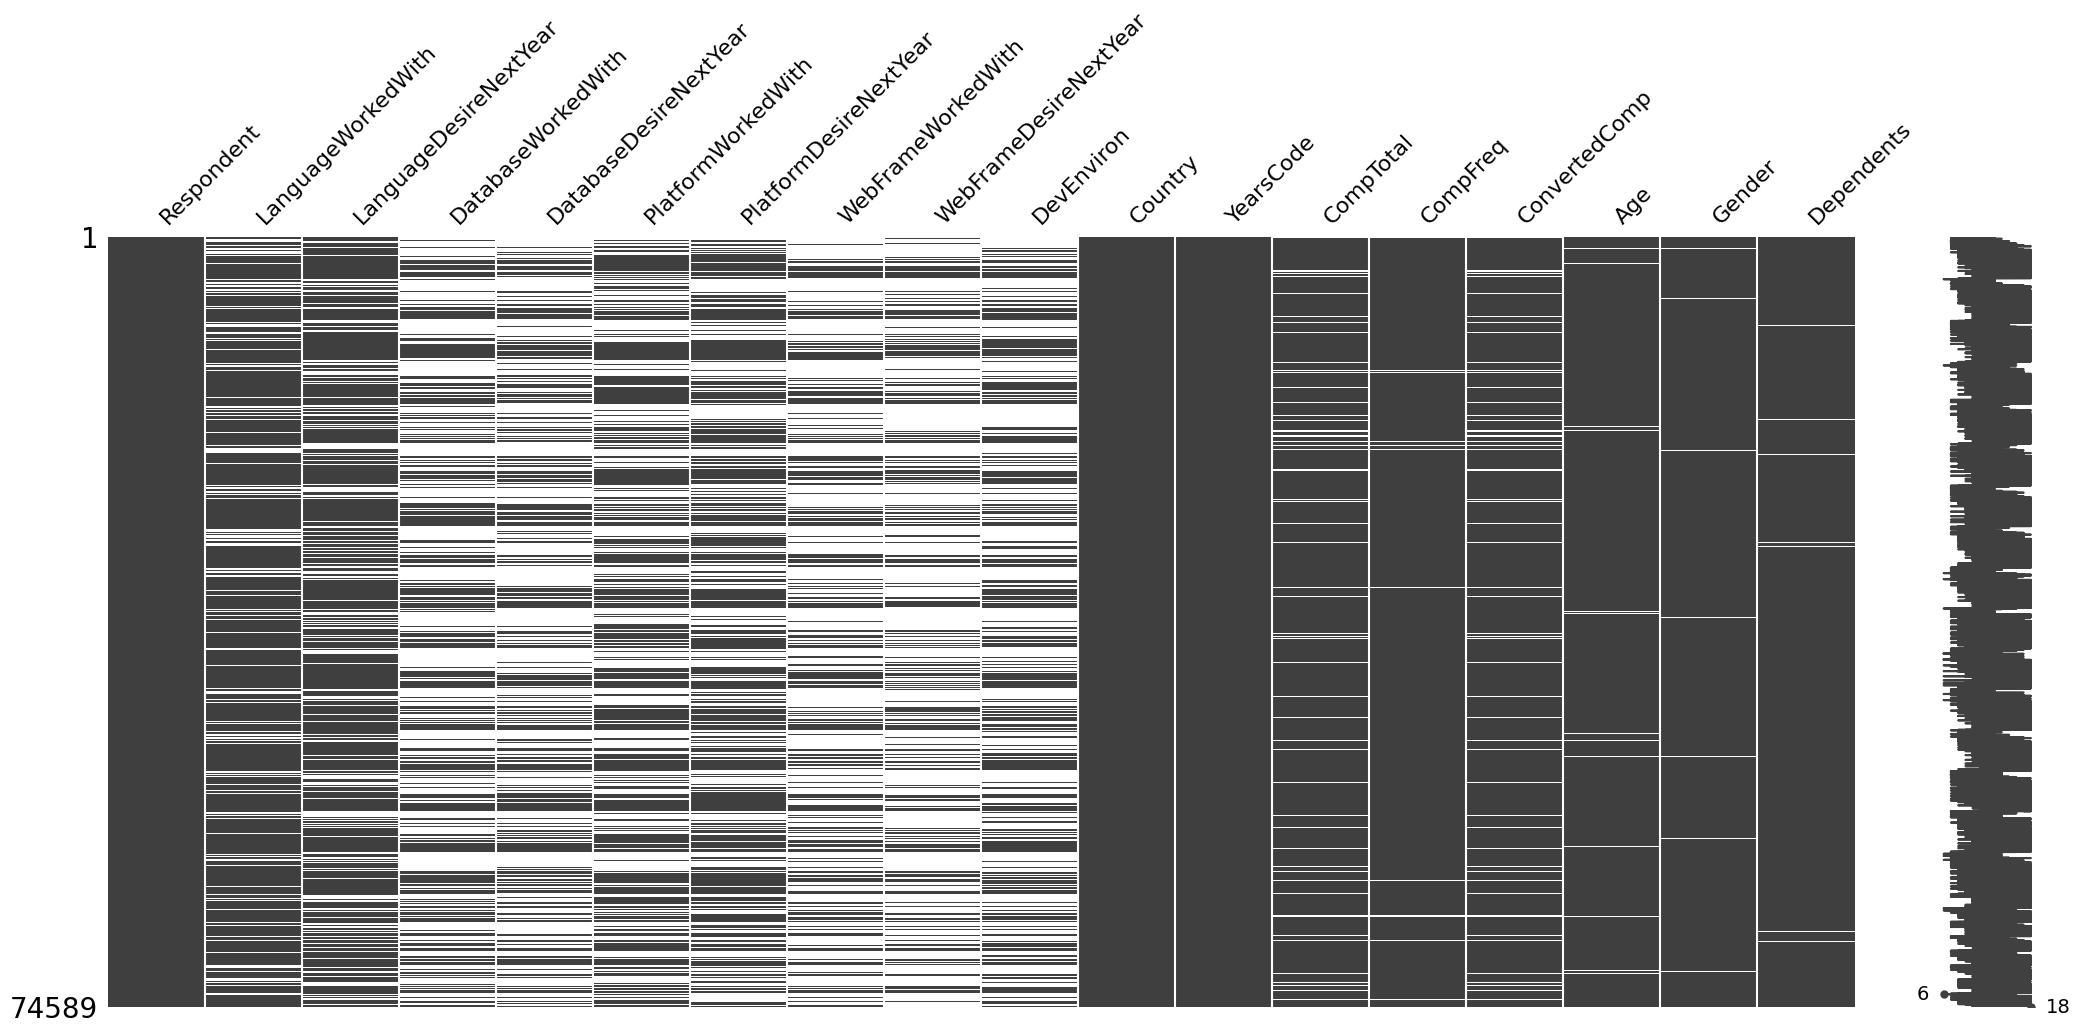

In [93]:
msgno.matrix(df)

In [94]:
df.describe(include="all")

,Respondent,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,DevEnviron,Country,YearsCode,CompTotal,CompFreq,ConvertedComp,Age,Gender,Dependents
count,74589.000000,59792,55764,31375,29575,39208,44314,24803,24567,33306,74589,74531,6.899500e+04,73235,6.895900e+04,72708.000000,74076,73616
unique,NaN,28,28,14,14,17,17,13,13,22,135,51,NaN,3,NaN,NaN,7,2
top,NaN,JavaScript,JavaScript,MySQL,PostgreSQL,Linux,Linux,jQuery,React.js,Visual Studio Code,United States,10,NaN,Yearly,NaN,NaN,Man,No
freq,NaN,8687,6630,5469,4328,5811,5865,4629,4714,6639,20818,6584,NaN,39743,NaN,NaN,68957,43579
mean,12435.258228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.126944e+05,NaN,1.312748e+05,30.619533,NaN,NaN
std,7239.729251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.479358e+06,NaN,2.931527e+05,7.380474,NaN,NaN
min,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,16.000000,NaN,NaN
25%,6196.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000e+04,NaN,2.628200e+04,25.000000,NaN,NaN
50%,12422.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000e+04,NaN,5.774400e+04,29.000000,NaN,NaN
75%,18756.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.200000e+05,NaN,1.000000e+05,34.000000,NaN,NaN


Also, we change data types and replace some missing values.

In [95]:
# First we fill mising values
df[["LanguageWorkedWith","LanguageDesireNextYear","DatabaseWorkedWith","DatabaseDesireNextYear","PlatformWorkedWith","PlatformDesireNextYear","WebFrameWorkedWith","WebFrameDesireNextYear","DevEnviron","Gender","Dependents","CompFreq"]] = df[["LanguageWorkedWith","LanguageDesireNextYear","DatabaseWorkedWith","DatabaseDesireNextYear","PlatformWorkedWith","PlatformDesireNextYear","WebFrameWorkedWith","WebFrameDesireNextYear","DevEnviron","Gender","Dependents","CompFreq"]].fillna(value="No answer")
# YearsCode is a int64 value type so we have to add an extra line
# First we replace None value
df["YearsCode"].fillna(np.nan,inplace=True)
# Then nan with 0
df["YearsCode"].fillna("0",inplace=True)
# Also, Age has to be filled with mean as imputation. 
Age_avg = df["Age"].mean()
df["Age"].fillna(Age_avg,inplace=True)

In [96]:
# Now replace the values
responses = {'Less than 1 year':"0"}
df["YearsCode"].replace(responses, inplace=True)
df["YearsCode"].replace(np.nan,"0", inplace=True)

In [97]:
# Now we change the data type of YearsCode and Age column
df["YearsCode"] = df["YearsCode"].astype(np.int64)
df["Age"] = df["Age"].astype(np.int64)

Now, for the CompTotal there are values that are anualized based on the compensation frequency, so we have to convert them to a monthly value, also it is very helpful for filling missing values and handle outliers.

In [98]:
# We define the conditions and calculations
conditions = [
    (df["CompFreq"] == "Yearly"),
    (df["CompFreq"] == "Weekly"),
    (df["CompFreq"] == "Monthly"),
    
]

calculations = [
    df["CompTotal"] / 12,    # Calculate monthly salary for yearly compensation
    df["CompTotal"] * 4,     # Calculate monthly salary for weekly compensation
    df["CompTotal"],         # Monthly compensation remains the same for monthly compensation

]

# And then we apply the conditions on a new column
df["FinalComp"] = np.select(conditions, calculations, default=df["CompTotal"])

Now we are going to remove outliers.

In [99]:
# The central tendency measure aplied is median.
Comp_mean = df["FinalComp"].median()
df["FinalComp"].fillna(Comp_mean,inplace=True)

In [100]:
# Now we get the iqr
perc_25th = np.percentile(df["FinalComp"], 25)
perc_75th = np.percentile(df["FinalComp"], 75)
iqr = perc_75th - perc_25th
# Then lower and upper values
lower_value = perc_25th - 1.5 * iqr
upper_value = perc_75th + 1.5 * iqr
# Finally we remove extreme values out of the data set
df = df[(df["FinalComp"] <= upper_value) & (df["FinalComp"] >= lower_value)]

<AxesSubplot: xlabel='FinalComp', ylabel='Count'>

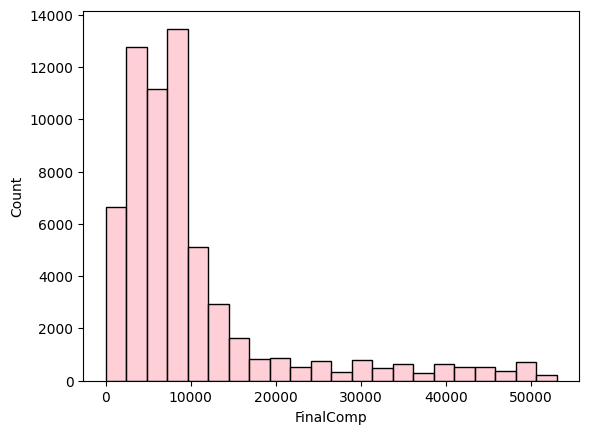

In [101]:
# Finally, we visualize the distribution
sns.histplot(df["FinalComp"],bins=22, color="pink")

Now we can check for the rest of the columns and see the data types

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62228 entries, 0 to 74588
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              62228 non-null  int64  
 1   LanguageWorkedWith      62228 non-null  object 
 2   LanguageDesireNextYear  62228 non-null  object 
 3   DatabaseWorkedWith      62228 non-null  object 
 4   DatabaseDesireNextYear  62228 non-null  object 
 5   PlatformWorkedWith      62228 non-null  object 
 6   PlatformDesireNextYear  62228 non-null  object 
 7   WebFrameWorkedWith      62228 non-null  object 
 8   WebFrameDesireNextYear  62228 non-null  object 
 9   DevEnviron              62228 non-null  object 
 10  Country                 62228 non-null  object 
 11  YearsCode               62228 non-null  int64  
 12  CompTotal               56634 non-null  float64
 13  CompFreq                62228 non-null  object 
 14  ConvertedComp           56624 non-null

We validate there are not duplicates in our dataset

In [103]:
# Also, we are going to look for duplicates
df.duplicated().sum()
assert([df.duplicated() == True])

## EDA

### 1. ¿Which are the top 10 most used databases? and; 2. ¿Is this changing next year?

In [104]:
#We can now begin with EDA, note that No answer is a huge cattegory so we need to omit this one.
top10_used_db = df.groupby("DatabaseWorkedWith")["Respondent"].count().sort_values(ascending=False).reset_index()
top10_used_db = top10_used_db[top10_used_db["DatabaseWorkedWith"] != "No answer"]


Text(0.5, 0, 'Database')

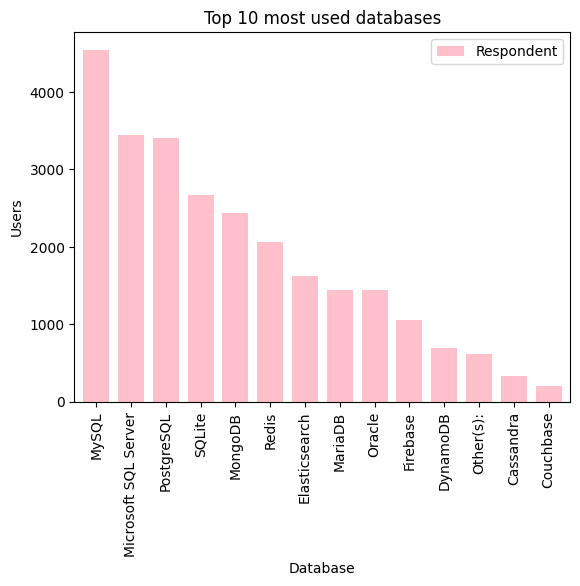

In [105]:
top10_used_db.plot(kind="bar", x="DatabaseWorkedWith", y="Respondent", width = 0.75, color = "pink")
plt.title("Top 10 most used databases")
plt.ylabel("Users")
plt.xlabel("Database")


As we can see, MySQL is the most used database.

In [106]:
#Now lets check in to the future trend
top10_future_db = df.groupby("DatabaseDesireNextYear")["Respondent"].count().reset_index()
top10_future_db = top10_future_db[top10_future_db["DatabaseDesireNextYear"] != "No answer"]
#Also we are going to add a ranking
top10_future_db["Ranking"] = top10_future_db["Respondent"].rank(ascending=False)
# And filter up to 10th position
top10_future_db = top10_future_db[top10_future_db["Ranking"] <= 10]
#Finally we re order the data
top10_future_db = top10_future_db.sort_values(by="Ranking",ascending=False)

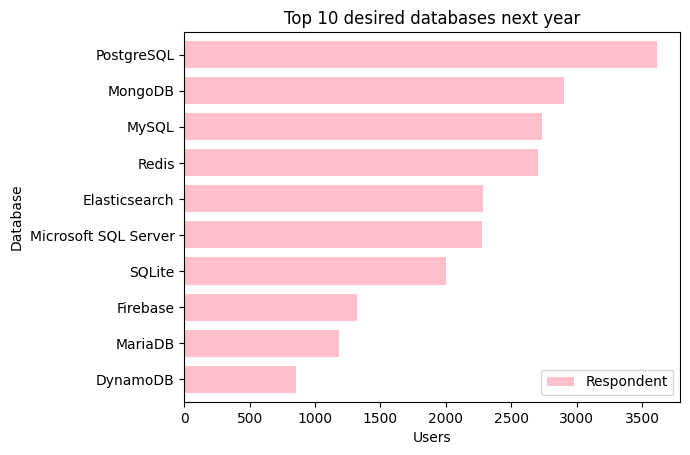

In [107]:
#Now we can add the graph
top10_future_db.plot(kind="barh", x="DatabaseDesireNextYear", y="Respondent", width = 0.75, color = "pink")
plt.title("Top 10 desired databases next year")
plt.ylabel("Database")
plt.xlabel("Users")
plt.show()

Seems like PostgreSQL is going to have a huge demand the next year.

### As we can see from the above graphs, seems like MySQL, SQL Server and PostgreSQL are the most popular databases among users, but PostgreSQL is the one that leads future skills demand. As the oposite of this, Cassandra and Couchbase are neither wide used nor an interesting database to learn for users.

### 3. ¿How is Age column distributed?

<AxesSubplot: xlabel='Age', ylabel='Count'>

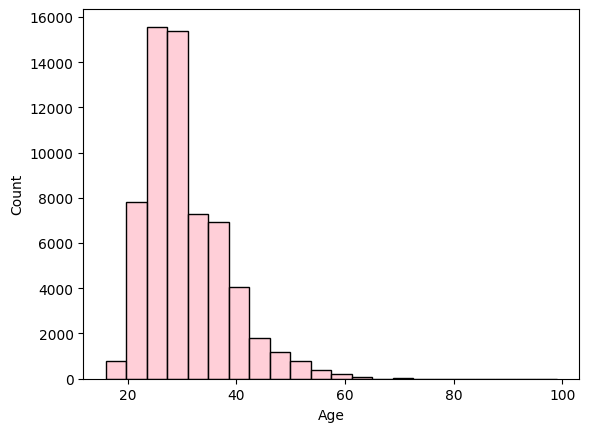

In [108]:
sns.histplot(df["Age"],bins=22, color="pink")

In [109]:
total_count = df["Age"].count()
Age_distr = df.groupby("Age")["Respondent"].count().reset_index().sort_values(by="Respondent",ascending=False)
Age_distr["percentage"] = Age_distr["Respondent"]/total_count * 100
print(Age_distr)
#sns.barplot(data=Age_distr, x="Respondent")

# Can be done with df["Age"].value_counts(normalize=True)*100

    Age  Respondent  percentage
14   30        5006    8.044610
12   28        4118    6.617600
9    25        4054    6.514752
8    24        3898    6.264061
10   26        3824    6.145144
11   27        3790    6.090506
13   29        3501    5.626085
7    23        3315    5.327184
15   31        2742    4.406377
16   32        2586    4.155686
17   33        2481    3.986951
6    22        2443    3.925885
18   34        2201    3.536993
19   35        2139    3.437359
20   36        1712    2.751173
21   37        1587    2.550299
22   38        1478    2.375137
5    21        1351    2.171048
23   39        1242    1.995886
24   40        1019    1.637527
26   42         967    1.553963
25   41         809    1.300058
4    20         701    1.126503
3    19         520    0.835637
28   44         505    0.811532
27   43         480    0.771357
29   45         431    0.692614
31   47         399    0.641190
33   49         386    0.620300
32   48         377    0.605837
30   46 

As we can see, biggest bins vary from 20 to 30 years.

### 4. (Plus) ¿Is there any relationship between Age and Compensation?

<AxesSubplot: xlabel='Age', ylabel='FinalComp'>

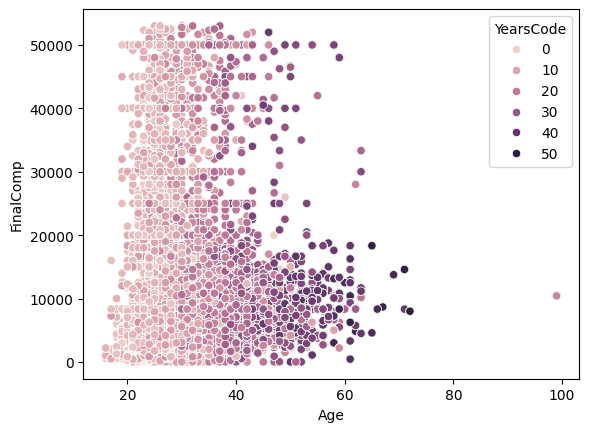

In [110]:
sns.scatterplot(data=df,x="Age",y="FinalComp", hue="YearsCode")

In [111]:
correlation = df[["Age","FinalComp"]].corr()
correlation

,Age,FinalComp
Age,1.000000,0.034229
FinalComp,0.034229,1.000000


There is not clear correlation between age and compensation.

In [113]:
#Finally we export our dataset to create a dashboard
df.to_csv("Clapston_Project_Final.csv")

## Final Comments

1. Above results indicates that MySQL, SQL Server and PostgreSQL are the most popular databases among users. 
2. PostgreSQL, MongoDB and MySQL are the ones that leads future skills demand.
3. Most of the respondants are between 20 and 30 years old.
4. Further questions include: ¿How country and gender impacts preferences for one tool or another?